In [34]:
import numpy as np
import pandas as pd

In [35]:
weather = pd.read_csv("data/t_Kyiv.csv", index_col="DATE")

In [36]:
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1970-01-01,UPM00033345,"KIEV, UP",0.13,NaN,-1.0,11.0,-9.0
1970-01-02,UPM00033345,"KIEV, UP",0.37,NaN,28.0,34.0,11.0
1970-01-03,UPM00033345,"KIEV, UP",0.27,NaN,22.0,32.0,16.0
1970-01-04,UPM00033345,"KIEV, UP",0.00,NaN,22.0,31.0,15.0
1970-01-05,UPM00033345,"KIEV, UP",0.00,NaN,28.0,37.0,20.0
...,...,...,...,...,...,...,...
2025-03-12,UPM00033345,"KIEV, UP",NaN,NaN,51.0,56.0,45.0
2025-03-13,UPM00033345,"KIEV, UP",NaN,NaN,50.0,59.0,40.0
2025-03-14,UPM00033345,"KIEV, UP",NaN,NaN,54.0,60.0,NaN


In [37]:
# відсоток пустих вимірювань в рядках
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.270187
SNWD       0.825614
TAVG       0.001460
TMAX       0.100836
TMIN       0.203081
dtype: float64

In [38]:
# з всіх вимірювань вибираємо лише максимальну, мінімальну та середню температури
core_weather = weather[["TAVG", "TMAX", "TMIN"]].copy()

In [39]:
core_weather

,TAVG,TMAX,TMIN
DATE,,,
1970-01-01,-1.0,11.0,-9.0
1970-01-02,28.0,34.0,11.0
1970-01-03,22.0,32.0,16.0
1970-01-04,22.0,31.0,15.0
1970-01-05,28.0,37.0,20.0
...,...,...,...
2025-03-12,51.0,56.0,45.0
2025-03-13,50.0,59.0,40.0
2025-03-14,54.0,60.0,NaN


In [40]:
# пусті вимірювання 
core_weather[pd.isnull(core_weather["TAVG"])]

,TAVG,TMAX,TMIN
DATE,,,
2006-01-06,NaN,NaN,NaN
2006-01-07,NaN,NaN,NaN
2006-02-25,NaN,NaN,NaN
2006-02-27,NaN,NaN,NaN
2006-03-08,NaN,NaN,NaN
2006-11-05,NaN,NaN,NaN
2007-01-28,NaN,NaN,NaN
2007-02-18,NaN,NaN,NaN
2007-09-07,NaN,NaN,NaN


In [41]:
# тут використовується форвард філ, тобто дублювання даних з попереднього рядка
core_weather = core_weather.fillna(method="ffill")

In [42]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

TAVG    0.0
TMAX    0.0
TMIN    0.0
dtype: float64

In [43]:
# Далі будемо перевіряти чи всі дані мають правильний тип даних для машиного навчання 

In [44]:
core_weather.index
# тип індекса - object, що означає що це просто рядок, але для ML треба це все перетворити в тип datetime

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
       '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15', '2025-03-16'],
      dtype='object', name='DATE', length=19864)

In [45]:
core_weather.index = pd.to_datetime(weather.index)

In [46]:
core_weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10',
               '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14',
               '2025-03-15', '2025-03-16'],
              dtype='datetime64[ns]', name='DATE', length=19864, freq=None)

In [47]:
# перевіряємо на помилки в вимірюваннях 
core_weather.apply(lambda x: (x == 9999).sum())

#як ми бачимо в датасеті немає помилок в вимірюваннях

TAVG    0
TMAX    0
TMIN    0
dtype: int64

<AxesSubplot: xlabel='DATE'>

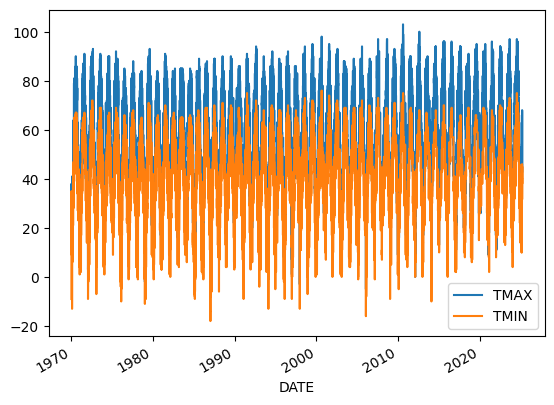

In [48]:
#З цього блоку коду починається аналіз даних
core_weather[["TMAX", "TMIN"]].plot()


<AxesSubplot: xlabel='DATE'>

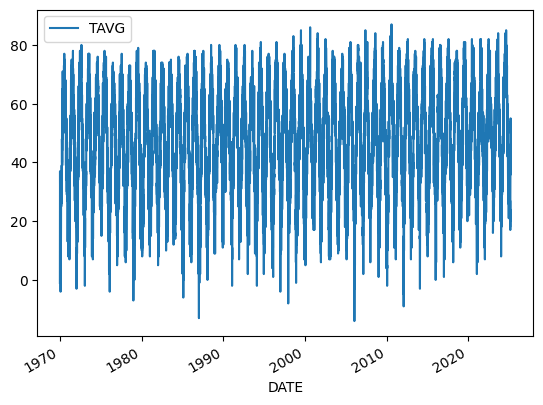

In [49]:
core_weather[["TAVG"]].plot()

In [50]:
#Як ми бачимо з графіків, в нас немає ніяких відсутніх даних, тому можемо залишити так, як є

#З наступного блоку коду почнеться тренування моделі 

In [51]:
# Спершу треба зрозуміти що ми хочемо передбачити. В даному випадку ми будемо старатись передбачити 
# максимальну температуру наступного дня використовуючи історичні дані.

# Створимо для цього нову "таргетну" колонку, 
#
# Ця колонка - це буде дублікат колонки TMAX, сдвинутий вгору

In [52]:
core_weather["target1"] = core_weather.shift(-1)["TAVG"]

core_weather

,TAVG,TMAX,TMIN,target1
DATE,,,,
1970-01-01,-1.0,11.0,-9.0,28.0
1970-01-02,28.0,34.0,11.0,22.0
1970-01-03,22.0,32.0,16.0,22.0
1970-01-04,22.0,31.0,15.0,28.0
1970-01-05,28.0,37.0,20.0,37.0
...,...,...,...,...
2025-03-12,51.0,56.0,45.0,50.0
2025-03-13,50.0,59.0,40.0,54.0
2025-03-14,54.0,60.0,40.0,42.0


In [53]:
# як ми бачимо в колонкі target1 кожний рядок певного дня вказує на завтрашню погоду, 
# тобто рядок дати першого січня 1970 вказує на погоду другого січня 1970. І ці завтрашні температури 
# в рядках є цілями, таргетами.
# 
# Можна помітити, що в останньому рядку Nan, тому його можна видалити

core_weather = core_weather.iloc[:-1, :].copy()
core_weather

,TAVG,TMAX,TMIN,target1
DATE,,,,
1970-01-01,-1.0,11.0,-9.0,28.0
1970-01-02,28.0,34.0,11.0,22.0
1970-01-03,22.0,32.0,16.0,22.0
1970-01-04,22.0,31.0,15.0,28.0
1970-01-05,28.0,37.0,20.0,37.0
...,...,...,...,...
2025-03-11,52.0,67.0,40.0,51.0
2025-03-12,51.0,56.0,45.0,50.0
2025-03-13,50.0,59.0,40.0,54.0


In [54]:
# Нарешті можна приступити до машинного навчання

from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1) # альфа - це коефіцієнт, який контролює наскільки великий коефіцієнт регресивної моделі аналізує,
                      # чим більше Penalty, тим біьлше запобігає overfitting моделі (див. в інтернеті)

In [55]:
predictors = ["TAVG", "TMIN", "TMAX"] # Які колонки слугують для передбачення

In [56]:
train = core_weather[:"2022-12-31"] # на цьому будемо тренувати тестову модель
test = core_weather["2023-01-01":] # а на цьому будемо перевіряти передбачення

In [57]:
# Тут ми "засовуємо" в модель передбачення наші дані (train[predictors])
# та до чого треба прямувати при передбаченні (train["target1"])
reg.fit(train[predictors], train["target1"]) 

Ridge(alpha=0.1)

In [58]:
predictions = reg.predict(test[predictors]) # Генеруємо передбачення

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target1"], predictions) # вираховує середнью абсолютну похибку

3.3738597799940795

In [ ]:
# як ми бачимо середня похибка поміж передбачень сягає приблизно 3.3 градуси,
# що є +- нормально, ((((але можна покращити точність)))).

In [61]:
# Скомбінуймо реальні дані з передбаченнями 

combined = pd.concat([test["target1"], pd.Series(predictions, index = test.index)], axis=1)
combined.columns = ["actual", "predictions"]

combined

,actual,predictions
DATE,,
2023-01-01,47.0,51.349025
2023-01-02,44.0,47.169901
2023-01-03,36.0,44.034558
2023-01-04,39.0,35.447812
2023-01-05,27.0,38.229840
...,...,...
2025-03-11,51.0,53.025480
2025-03-12,50.0,50.410243
2025-03-13,54.0,50.184509


<AxesSubplot: xlabel='DATE'>

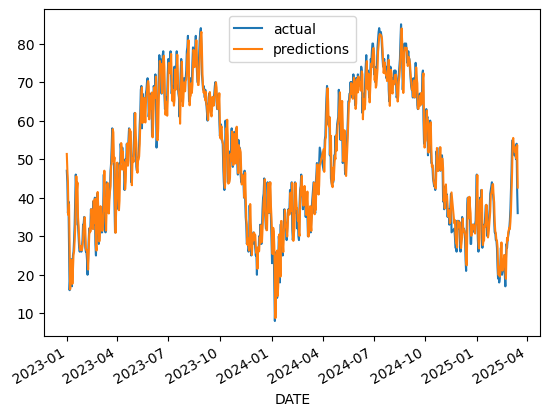

In [62]:
combined.plot()

In [63]:
reg.coef_ 
# це коефіцієнти моделі (формули), в яку підставляються, як я з розумів, в вчорашні дані для прогнозування сьогодні.
# тобто це приблизно виглядає як future_t = 0.41*t_avg-0.06*t_min+0.064*t_max+const

array([ 0.83582495, -0.03431911,  0.14616508])

In [64]:
# Зробимо функцію для передбачень 

def create_predictions(predictors, core_weather, reg):
    train = core_weather[:"2022-12-31"] # на цьому будемо тренувати тестову модель
    test = core_weather["2023-01-01":] # а на цьому будемо перевіряти передбачення
    reg.fit(train[predictors], train["target1"]) 
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target1"], predictions)
    combined = pd.concat([test["target1"], pd.Series(predictions, index = test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [ ]:
# далі ми створимо більше колонок для передбачення

# rolling(30).mean() робить наступне: для кожного дня rolling бере попередні 30 днів
# а mean вираховує середнє значення. Колонка month_max має в собі середні значення
# попередніх 30 днів, тому в перших 30и рядках буде NAN
core_weather["month_avg"] = core_weather["TAVG"].rolling(30).mean()

In [ ]:
eps = 1e-6

# наступна нова колона буде показувати наскільки температура рядка відрізняється
# від середнього значення за попередній місяць.
core_weather["month_day_avg"] = core_weather["month_avg"] / (core_weather["TAVG"]+eps)

# наступна нова колона буде показувати наскільки максимальна температура відрізняється
# від мінімальної температури 
core_weather["max_min"] = core_weather["TMAX"] / (core_weather["TMIN"]+eps)

In [102]:
# видаляємо перші 30 рядків, які мають NAN
core_weather = core_weather.iloc[30:,:].copy()

core_weather

,TAVG,TMAX,TMIN,target1,month_avg,month_day_avg,max_min
DATE,,,,,,,
1970-05-01,57.0,65.0,50.0,50.0,49.333333,0.865497,1.300000
1970-05-02,50.0,62.0,45.0,48.0,49.533333,0.990667,1.377778
1970-05-03,48.0,58.0,39.0,62.0,49.633333,1.034028,1.487179
1970-05-04,62.0,74.0,48.0,71.0,50.166667,0.809140,1.541667
1970-05-05,71.0,81.0,65.0,63.0,51.200000,0.721127,1.246154
...,...,...,...,...,...,...,...
2025-03-11,52.0,67.0,40.0,51.0,31.766667,0.610897,1.675000
2025-03-12,51.0,56.0,45.0,50.0,32.766667,0.642484,1.244444
2025-03-13,50.0,59.0,40.0,54.0,33.833333,0.676667,1.475000


In [ ]:
predictors = ["TAVG", "TMIN", "TMAX", "month_avg", "month_day_avg", "max_min"] #, "month_day_avg", "max_min"
error, combined = create_predictions(predictors, core_weather, reg)

In [105]:
error

3.320117002549251

<AxesSubplot: xlabel='DATE'>

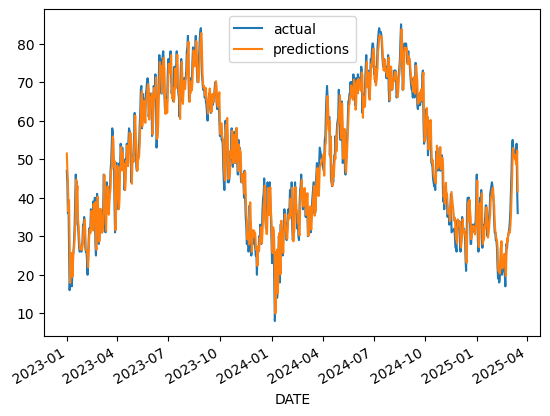

In [106]:
combined.plot()

In [109]:
# Спочатку ми групуємо дані по місяцях .groupby(core_weather.index.month), 
# для кожного дня з місяця .apply(lambda x: x.expanding(1).mean()) бере 
# кожен попередній рядок даного рядка та розраховує середнє значення
core_weather["month_avg_t"] = core_weather["TAVG"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

/tmp/ipykernel_15193/72545142.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["month_avg_t"] = core_weather["TAVG"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())


In [111]:
# Спочатку ми групуємо дані по роках .groupby(core_weather.index.year), 
# для кожного дня з місяця .apply(lambda x: x.expanding(1).mean()) бере 
# кожен попередній рядок даного рядка та розраховує середнє значення
core_weather["day_of_year_avg"] = core_weather["TAVG"].groupby(core_weather.index.year).apply(lambda x: x.expanding(1).mean())

/tmp/ipykernel_15193/1221310564.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["day_of_year_avg"] = core_weather["TAVG"].groupby(core_weather.index.year).apply(lambda x: x.expanding(1).mean())


In [112]:
core_weather

,TAVG,TMAX,TMIN,target1,month_avg,month_day_avg,max_min,month_avg_t,day_of_year_avg
DATE,,,,,,,,,
1970-05-01,57.0,65.0,50.0,50.0,49.333333,0.865497,1.300000,57.000000,57.000000
1970-05-02,50.0,62.0,45.0,48.0,49.533333,0.990667,1.377778,53.500000,53.500000
1970-05-03,48.0,58.0,39.0,62.0,49.633333,1.034028,1.487179,51.666667,51.666667
1970-05-04,62.0,74.0,48.0,71.0,50.166667,0.809140,1.541667,54.250000,54.250000
1970-05-05,71.0,81.0,65.0,63.0,51.200000,0.721127,1.246154,57.600000,57.600000
...,...,...,...,...,...,...,...,...,...
2025-03-11,52.0,67.0,40.0,51.0,31.766667,0.610897,1.675000,35.505719,33.171429
2025-03-12,51.0,56.0,45.0,50.0,32.766667,0.642484,1.244444,35.515042,33.422535
2025-03-13,50.0,59.0,40.0,54.0,33.833333,0.676667,1.475000,35.523752,33.652778


In [113]:
predictors = ["TAVG", "TMIN", "TMAX", "month_avg", "month_day_avg", "max_min", "month_avg_t", "day_of_year_avg"] #, "month_day_avg", "max_min"
error, combined = create_predictions(predictors, core_weather, reg)

In [114]:
error

3.2462464269632503